<h1>Aplicação do Método K-means para construção de Scores</h1>

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

print('Loaded libs')

Loaded libs


Clustering (K-Means): Para agrupar clientes em clusters e pontuá-los com base nos clusters.

In [2]:
data = pd.read_csv('storage/processed/dados_mean.csv', sep=',')

data.columns

Index(['leads_tempo_desde_evento_anterior_mean',
       'leads_tempo_desde_evento_anterior_std',
       'leads_tempo_desde_evento_anterior_75',
       'leads_tempo_desde_evento_anterior_max', 'leads_score_midia_mean',
       'leads_score_midia_std', 'leads_score_midia_min',
       'leads_score_midia_25', 'leads_score_midia_50', 'leads_score_midia_75',
       'leads_score_midia_max', 'leads_vg_mean', 'leads_vg_std',
       'leads_vg_min', 'leads_vg_25', 'leads_vg_50', 'leads_vg_75',
       'leads_vg_max', 'leads_m2_anuncio_mean', 'leads_m2_anuncio_std',
       'leads_m2_anuncio_25', 'leads_m2_anuncio_50', 'leads_m2_anuncio_75',
       'leads_m2_anuncio_max', 'leads_in_dorm_mean', 'leads_in_dorm_75',
       'leads_in_dorm_max', 'leads_dl_area_total_mean',
       'leads_dl_area_total_std', 'leads_dl_area_total_50',
       'leads_dl_area_total_75', 'leads_dl_area_total_max',
       'leads_in_garagens_totais_mean', 'leads_in_garagens_totais_25',
       'leads_in_garagens_totais_50', 'leads_

In [3]:
# Normalização

scaler = StandardScaler()

dados_padronizados = pd.DataFrame(scaler.fit_transform(data))

dados_padronizados

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.181652,-0.177487,-0.279661,-0.013228,0.291592,0.155749,-0.188173,-0.091067,0.098615,0.040614,...,0.090744,0.193494,0.031327,0.007287,0.102376,-0.015456,0.072649,0.007986,0.181916,-1.518841
1,0.090382,0.239893,-0.408850,0.232466,-0.013996,2.145612,-0.644735,-0.791049,-1.185797,1.493769,...,-0.028324,-0.065199,-0.019373,-0.009758,-0.116432,-0.015456,0.047810,-0.017879,0.155194,-1.518841
2,-0.410506,-0.380325,-0.417184,-0.170133,1.212822,0.150025,0.852681,0.753532,0.535568,1.493769,...,-0.052138,-0.007712,-0.041102,-0.019984,-0.028909,-0.015456,-0.051546,-0.029817,-0.225161,-1.518841
3,0.179665,0.011474,0.124575,0.065489,-0.397737,-0.928267,-0.558411,-0.320106,-0.298555,-0.339976,...,-0.004510,-0.065199,-0.012130,-0.013167,-0.072670,-0.015456,-0.026707,-0.019869,0.179027,-1.518841
4,-0.439112,-0.392041,-0.440105,-0.175698,2.713818,0.000000,3.165639,3.139340,2.203926,1.493769,...,-0.075951,-0.022084,-0.030238,-0.019984,-0.072670,-0.015456,-0.126062,-0.033796,-0.235753,-1.518841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.352318,-0.323511,-0.415101,-0.133557,0.278649,1.169796,-0.558411,-0.379302,0.535568,1.493769,...,-0.004510,-0.065199,-0.004888,-0.023393,0.189899,-0.015456,-0.051546,-0.017879,-0.169552,0.658397
4996,0.054921,-0.071044,-0.146305,-0.015613,-0.154761,0.276178,-0.683963,-0.320106,-0.272107,0.040614,...,0.043117,0.064147,-0.012130,-0.016575,0.014853,1.415625,-0.001868,-0.013900,0.195396,0.658397
4997,0.043053,-0.149182,0.257931,-0.086910,-0.282915,-0.423639,-0.558411,-0.702006,-0.272107,0.040614,...,-0.052138,-0.065199,-0.033859,-0.023393,-0.160193,-0.015456,-0.076384,-0.033796,-0.138738,0.658397
4998,-0.433629,-0.387566,-0.438021,-0.171723,-0.001415,-0.776186,-0.188173,-0.320106,0.098615,0.040614,...,-0.052138,0.136006,0.016841,-0.006349,0.189899,-0.015456,0.097487,-0.007931,-0.226846,0.658397


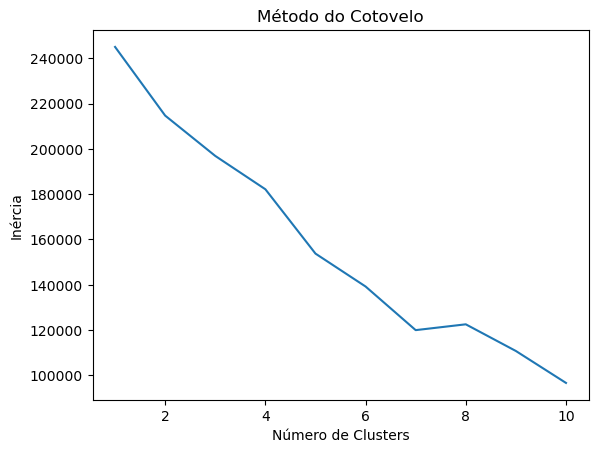

In [4]:
# Método para a escolha do Cluster

# Método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


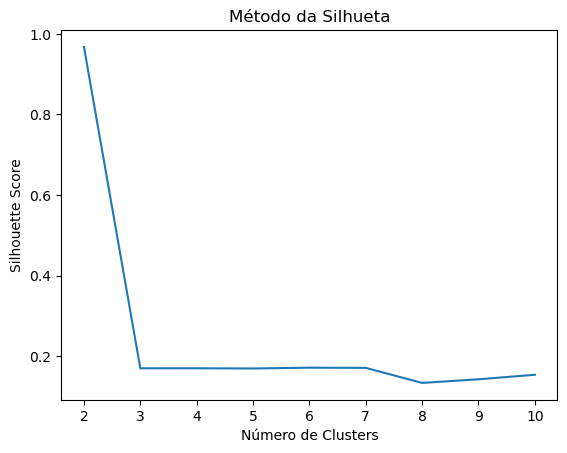

O número ideal de clusters é 2


In [5]:
# Método da Silhueta

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_scores = []
for k in range(2, 11):  # Começa de 2 porque não faz sentido calcular a silhueta para 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados)
    score = silhouette_score(dados_padronizados, kmeans.labels_)
    sil_scores.append(score)

# Plotando a pontuação de silhueta
plt.plot(range(2, 11), sil_scores)
plt.title('Método da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Encontrando o número de clusters com a maior pontuação de silhueta
best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f'O número ideal de clusters é {best_k}')


In [6]:
# Aplicando o K-Means com N clusters

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dados_padronizados)

# Obtendo os rótulos (clusters) atribuídos a cada cliente
dados_padronizados['cluster'] = kmeans.labels_

dados_padronizados

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,cluster
0,-0.181652,-0.177487,-0.279661,-0.013228,0.291592,0.155749,-0.188173,-0.091067,0.098615,0.040614,...,0.193494,0.031327,0.007287,0.102376,-0.015456,0.072649,0.007986,0.181916,-1.518841,1
1,0.090382,0.239893,-0.408850,0.232466,-0.013996,2.145612,-0.644735,-0.791049,-1.185797,1.493769,...,-0.065199,-0.019373,-0.009758,-0.116432,-0.015456,0.047810,-0.017879,0.155194,-1.518841,1
2,-0.410506,-0.380325,-0.417184,-0.170133,1.212822,0.150025,0.852681,0.753532,0.535568,1.493769,...,-0.007712,-0.041102,-0.019984,-0.028909,-0.015456,-0.051546,-0.029817,-0.225161,-1.518841,1
3,0.179665,0.011474,0.124575,0.065489,-0.397737,-0.928267,-0.558411,-0.320106,-0.298555,-0.339976,...,-0.065199,-0.012130,-0.013167,-0.072670,-0.015456,-0.026707,-0.019869,0.179027,-1.518841,0
4,-0.439112,-0.392041,-0.440105,-0.175698,2.713818,0.000000,3.165639,3.139340,2.203926,1.493769,...,-0.022084,-0.030238,-0.019984,-0.072670,-0.015456,-0.126062,-0.033796,-0.235753,-1.518841,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.352318,-0.323511,-0.415101,-0.133557,0.278649,1.169796,-0.558411,-0.379302,0.535568,1.493769,...,-0.065199,-0.004888,-0.023393,0.189899,-0.015456,-0.051546,-0.017879,-0.169552,0.658397,1
4996,0.054921,-0.071044,-0.146305,-0.015613,-0.154761,0.276178,-0.683963,-0.320106,-0.272107,0.040614,...,0.064147,-0.012130,-0.016575,0.014853,1.415625,-0.001868,-0.013900,0.195396,0.658397,0
4997,0.043053,-0.149182,0.257931,-0.086910,-0.282915,-0.423639,-0.558411,-0.702006,-0.272107,0.040614,...,-0.065199,-0.033859,-0.023393,-0.160193,-0.015456,-0.076384,-0.033796,-0.138738,0.658397,0
4998,-0.433629,-0.387566,-0.438021,-0.171723,-0.001415,-0.776186,-0.188173,-0.320106,0.098615,0.040614,...,0.136006,0.016841,-0.006349,0.189899,-0.015456,0.097487,-0.007931,-0.226846,0.658397,0


In [7]:
dados_padronizados['cluster'].value_counts()

cluster
0    2784
1    2214
2       2
Name: count, dtype: int64